# Boston housing prices

###Alexis Agustín Chávez Figueroa

## 1. I imported all the libraries that are going to be necessary. Besides, the data from the document that would be manipulated

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving HousingData.csv to HousingData (1).csv


In [ ]:
import io

boston = pd.read_csv(io.BytesIO(uploaded['HousingData.csv']))
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:

boston.fillna(0, inplace=True)

In [ ]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,0.00,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,0.00,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### (a) Download the Boston Housing Data

How many rows are in this data set? **506**

How many columns? **14**

What do the rows and columns represent? **The rows represent each one of the samples of data and the columns represent the different characteristics of the samples.**

## Columns:
CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000 dollars

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**As we can see, there's no missing data in any row. Therefore, the information is consistent.**

In [ ]:
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

**Change the row's type from object to numeric.**

In [ ]:

boston['MEDV']=boston['MEDV'].astype(float)
boston['CRIM']=boston['CRIM'].astype(float)
boston['ZN']=boston['ZN'].astype(float)
boston['INDUS']=boston['INDUS'].astype(float)
boston['CHAS']=boston['CHAS'].astype(float)
boston['NOX']=boston['NOX'].astype(float)
boston['RM']=boston['RM'].astype(float)
boston['AGE']=boston['AGE'].astype(float)
boston['DIS']=boston['DIS'].astype(float)
boston['TAX']=boston['TAX'].astype(float)
boston['PTRATIO']=boston['PTRATIO'].astype(float)
boston['B']=boston['B'].astype(float)
boston['LSTAT']=boston['LSTAT'].astype(float)



In [ ]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,0.00,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,0.00,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


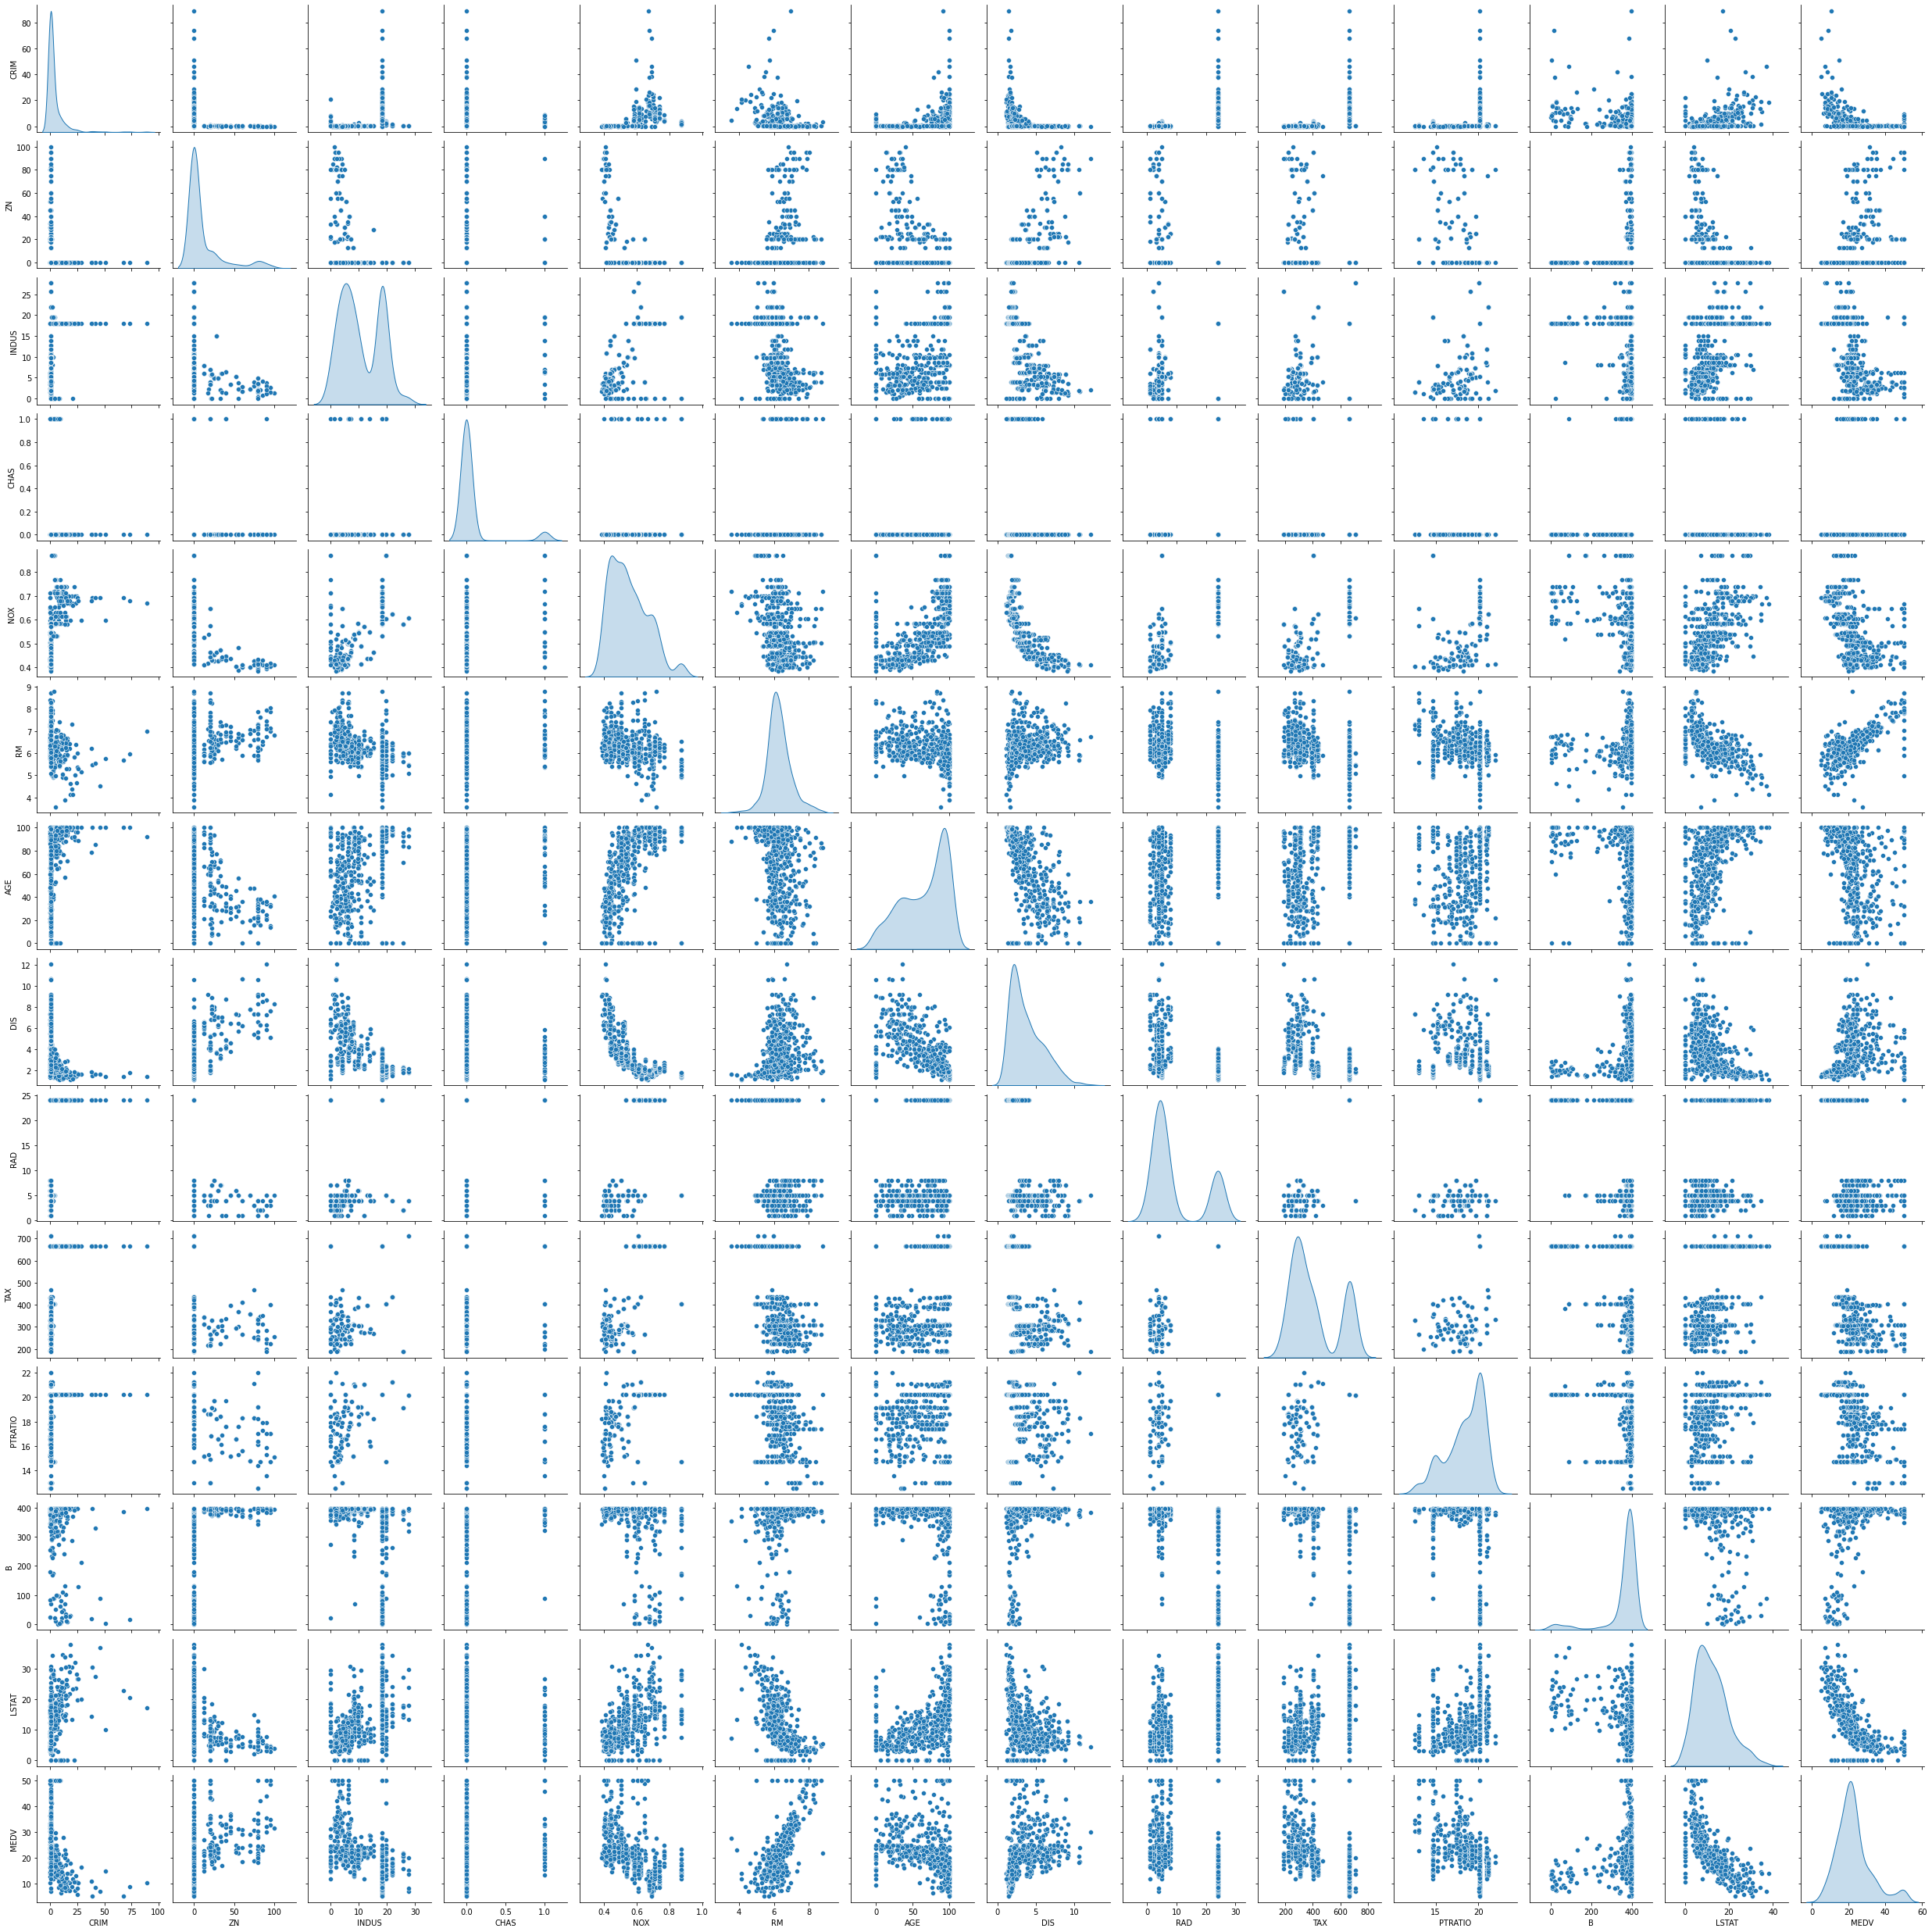

In [ ]:
sns.pairplot(boston, diag_kind='kde')

### (b) Make some pairwise scatterplots of the predictors (columns) in this data set.
Describe your findings.


**The higher the age, the higher the crime per capita.**

**We can see that the higher the average value of owner-occupied homes in thousands of dollars, the lower the percentage of the lower status of the population.**

**A large percentage of PTRATIO with B is a higher African American population relative to the pupil-teacher ratio.**

**The higher the proportion of wholesale businesses in the area, the higher the property taxes.**

## (c) Are any predictors associated with the per capita crime rate?
If so, explain the relationship.
INDUS - the proportion of non-retail business acres per town.

**Yes, we can see that for example the INDUS when it is at 15 to 20 the CRIM increases exponentially. Therefore, the more non-retail businesses, the higher the crime per capita.**

## (d) Do any of the suburbs of Boston appear to have particularly high crime rates?
Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

**Values which influence the increase in CRIM.**

ZN -  range: 0-25

INDUS - range: 13-14

CHAS - 0

NOX - range: 0.5-0.7

RM - range: 5-7.5

AGE - range: 90-100

DIS - range: 0-2

RAD - range: 20-25

TAX - range: 600-700

PTRATIO - range: 20

B - range 0-50, 300-400

LSTAT - range: 10-20

MEDV - range: 0-10

## (e) How many of the suburbs in this data set bound the Charles river?

In [ ]:
boston.CHAS.sum()

34.0

## (f) What is the median pupil-teacher ratio among the towns in this data set?

In [ ]:
np.median(boston.PTRATIO)

19.05

## (g) Which suburb of Boston has lowest median value of owner occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors?
Comment on your findings.

AGE - proportion of owner-occupied units built prior to 1940

In [ ]:

np.median(boston.AGE)


74.45

In [ ]:
dataframe = pd.DataFrame(boston, columns=['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
rslt_df = dataframe[(dataframe['AGE'] >= 70) & (dataframe['AGE'] <= 80)]

rslt_df


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,2,242.0,17.8,396.90,9.14
76,20.0,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,5,398.0,18.7,373.66,11.97
81,23.9,0.04462,25.0,4.86,0.0,0.426,6.619,70.4,4,281.0,19.0,395.63,7.22
91,22.0,0.03932,0.0,3.41,0.0,0.489,6.405,73.9,2,270.0,17.8,393.55,8.20
94,20.6,0.04294,28.0,15.04,0.0,0.464,6.249,77.3,4,270.0,18.2,396.90,10.59
97,38.7,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,2,276.0,18.0,396.90,4.21
100,27.5,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,5,384.0,20.9,394.76,9.42
101,26.5,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,5,384.0,20.9,395.58,7.67
116,21.2,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,6,432.0,17.8,393.30,0.00
118,20.4,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,6,432.0,17.8,338.63,15.37



**Predictors in the lower part of the range:**
<ul>
    <li>ZN, belongs to the most common value 0.</li>
    <li>CHAS, does not adjoin the Charles River, most commonly.</li>
    <li>NOX, is a very similar value between the registers.</li>
    <li>TAX, is a value that other suburbs are close to.</li>
    <li>LSTAT, fairly common value, very close to the most repeated one.</li>
</ul>

**Predictors at the top of the range:**
<ul>
    <li>B, is close to the maximum possible value.</li>
</ul>

**Predictors in the middle of the range:**
<ul>
    <li>MEDV, although the most common values are found in lower values.</li>
    <li>CRIM, but could be considered a somewhat high value for the most common values.</li>
    <li>INDUS, barely falls in the middle part of the range, a relatively common value.</li>
    <li>RM, is almost at the center of the range along with most other suburbs.</li>
    <li>DIS, is in the middle with a relatively infrequent value.</li>
    <li>PRATIO, is a value near the top of the range, quite close to several others.</li>
</ul>

## (h) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling?
Comment on the suburbs that average more than eight rooms per dwelling.
RM - average number of rooms per dwelling
In this data set, how many of the suburbs average more than seven rooms per dwelling?

In [ ]:
dataframe = pd.DataFrame(boston, columns=['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
rslt_df = dataframe[(dataframe['RM'] >= 7) & (dataframe['RM'] < 8)]
rslt_df.count()



MEDV       51
CRIM       51
ZN         51
INDUS      51
CHAS       51
NOX        51
RM         51
AGE        51
RAD        51
TAX        51
PTRATIO    51
B          51
LSTAT      51
dtype: int64

More than eight rooms per dwelling?


In [ ]:
dataframe = pd.DataFrame(boston, columns=['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
rslt_df2 = dataframe[(dataframe['RM'] >= 8) & (dataframe['RM'] < 9)]
rslt_df2.count()

MEDV       13
CRIM       13
ZN         13
INDUS      13
CHAS       13
NOX        13
RM         13
AGE        13
RAD        13
TAX        13
PTRATIO    13
B          13
LSTAT      13
dtype: int64

In [ ]:
rslt_df2

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
97,38.7,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,2,276.0,18.0,396.90,4.21
163,50.0,1.51902,0.0,19.58,1.0,0.6050,8.375,0.0,5,403.0,14.7,388.45,3.32
204,50.0,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,4,224.0,14.7,390.55,2.88
224,44.8,0.31533,0.0,6.20,0.0,0.5040,8.266,78.3,8,307.0,17.4,385.05,4.14
225,50.0,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,8,307.0,17.4,382.00,4.63
226,37.6,0.38214,0.0,6.20,0.0,0.5040,8.040,86.5,8,307.0,17.4,387.38,0.00
232,41.7,0.57529,0.0,6.20,0.0,0.5070,8.337,73.3,8,307.0,17.4,385.91,2.47
233,48.3,0.33147,0.0,6.20,0.0,0.5070,8.247,0.0,8,307.0,17.4,378.95,3.95
253,42.8,0.36894,22.0,5.86,0.0,0.4310,8.259,8.4,7,330.0,19.1,396.90,3.54
257,50.0,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,5,264.0,13.0,389.70,5.12


**Those with an average of 8 rooms per dwelling have a high AGE, in the middle range of MEDV with low CRIM and a high TAX level.**

## (i) Split the data in training (70%) and test (30%) data, use the linear regression model with the training data, and test it to predict House value.
How well did the model perform? How can you improve these results?

In [ ]:
dataframe = pd.DataFrame(boston, columns=['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
dataframe = dataframe.drop(['MEDV'], axis=1)


In [ ]:
X = dataframe.to_numpy()
y = boston['MEDV']
X.shape

(506, 12)

In [ ]:
## Split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## 3. Model Creation

In [ ]:
## Prepare model
reg_model = LinearRegression()

## 4. Model training

#### Adjusting Model with Historic Data
Historic Data is also called Training Data or in this case X_train

In [ ]:
reg_model.fit(X_train, y_train)

LinearRegression()

### 5. Prediction for new Data
In this case, new Data is the Test set or X_test

In [ ]:
y_predict = reg_model.predict(X_test)
y_predict

array([28.07548189, 26.9866059 , 19.80774372, 22.82976871, 17.62088213,
       18.95697827, 27.12540265, 17.91785082, 25.14825152, 24.80201203,
       26.40468837, 28.3023681 , 19.88155509, 24.99001067, 21.62666347,
       22.89609696, 26.58789284, 36.88803349, 28.30238431,  9.19645206,
       20.50273558, 17.31384807, 24.67071398, 24.6962051 , 29.17463352,
       11.06728734, 14.07536483, 21.57465708, 34.25478655, 13.80376145,
       26.30950893, 17.40590977, 38.73709386, 18.20328428, 24.07997689,
       18.85913981, 17.83568946, 31.025475  ,  5.61462772, 20.44708658,
       25.54210092, 23.36621572, 27.76376586, 16.18310368, 18.61623197,
       15.45368329, 39.41367203, 18.37229272, 25.31015982, 18.15156673,
       29.51618662, 26.46769001, 26.15580177, 26.05687355,  5.88064702,
       25.62254762, 11.26192005, 24.28025958, 17.03503571, 35.22558747,
       19.05237319, 26.68552566, 15.63263804, 18.6164361 , 12.1718755 ,
       29.27335529, 36.29228317, 25.65581676, 26.51840592, 24.75

### 6. Visualization of Results

In [ ]:
reg_model.score(X_test, y_test)

0.7475182611173463

## (j) We will now try to predict per capita crime rate using the other variables in this data set.
In
other words, per capita crime rate is the response, and the other variables are the predictors.
For each predictor, individually, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant association
between the predictor and the response? Create some plots to back up your assertions.


## 7. Model Creation

In [ ]:
## Prepare model
reg_model1 = LinearRegression()
reg_model2 = LinearRegression()
reg_model3 = LinearRegression()
reg_model4 = LinearRegression()
reg_model5 = LinearRegression()
reg_model6 = LinearRegression()
reg_model7 = LinearRegression()
reg_model8 = LinearRegression()
reg_model9 = LinearRegression()
reg_model10 = LinearRegression()
reg_model11 = LinearRegression()
reg_model12 = LinearRegression()
reg_model13 = LinearRegression()

## 8. Data manipulation

In [ ]:
model1 = boston['ZN']
model2 = boston['INDUS']
model3 = boston['CHAS']
model4 = boston['NOX']
model5 = boston['RM']
model6 = boston['AGE']
model7 = boston['DIS']
model8 = boston['RAD']
model9 = boston['TAX']
model10 = boston['PTRATIO']
model11 = boston['B']
model12 = boston['LSTAT']
model13 = boston['MEDV']

In [ ]:
X1 = model1.to_numpy().reshape(-1, 1)
X2 = model2.to_numpy().reshape(-1, 1)
X3 = model3.to_numpy().reshape(-1, 1)
X4 = model4.to_numpy().reshape(-1, 1)
X5 = model5.to_numpy().reshape(-1, 1)
X6 = model6.to_numpy().reshape(-1, 1)
X7 = model7.to_numpy().reshape(-1, 1)
X8 = model8.to_numpy().reshape(-1, 1)
X9 = model9.to_numpy().reshape(-1, 1)
X10 = model10.to_numpy().reshape(-1, 1)
X11 = model11.to_numpy().reshape(-1, 1)
X12 = model12.to_numpy().reshape(-1, 1)
X13 = model13.to_numpy().reshape(-1, 1)
y = boston['CRIM']

In [ ]:
## Split between train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.3, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.3, random_state = 1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.3, random_state = 1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.3, random_state = 1)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.3, random_state = 1)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y, test_size=0.3, random_state = 1)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y, test_size=0.3, random_state = 1)
X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y, test_size=0.3, random_state = 1)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y, test_size=0.3, random_state = 1)
X11_train, X11_test, y11_train, y11_test = train_test_split(X11, y, test_size=0.3, random_state = 1)
X12_train, X12_test, y12_train, y12_test = train_test_split(X12, y, test_size=0.3, random_state = 1)
X13_train, X13_test, y13_train, y13_test = train_test_split(X13, y, test_size=0.3, random_state = 1)

## 9. Model training

In [ ]:
reg_model1.fit(X1_train, y_train)
reg_model2.fit(X2_train, y_train)
reg_model3.fit(X3_train, y_train)
reg_model4.fit(X4_train, y_train)
reg_model5.fit(X5_train, y_train)
reg_model6.fit(X6_train, y_train)
reg_model7.fit(X7_train, y_train)
reg_model8.fit(X8_train, y_train)
reg_model9.fit(X9_train, y_train)
reg_model10.fit(X10_train, y_train)
reg_model11.fit(X11_train, y_train)
reg_model12.fit(X12_train, y_train)
reg_model13.fit(X13_train, y_train)

LinearRegression()

### 10. Prediction for new Data


In [ ]:
y_predict1 = reg_model1.predict(X1_test)
y_predict2 = reg_model2.predict(X2_test)
y_predict3 = reg_model3.predict(X3_test)
y_predict4 = reg_model4.predict(X4_test)
y_predict5 = reg_model5.predict(X5_test)
y_predict6 = reg_model6.predict(X6_test)
y_predict7 = reg_model7.predict(X7_test)
y_predict8 = reg_model8.predict(X8_test)
y_predict9 = reg_model9.predict(X9_test)
y_predict10 = reg_model10.predict(X10_test)
y_predict11 = reg_model11.predict(X11_test)
y_predict12 = reg_model12.predict(X12_test)
y_predict13 = reg_model13.predict(X13_test)

### 11. Visualization of Results

In [ ]:
print(
reg_model1.score(X1_test, y1_test),
reg_model2.score(X2_test, y2_test),
reg_model3.score(X3_test, y3_test),
reg_model4.score(X4_test, y4_test),
reg_model5.score(X5_test, y5_test),
reg_model6.score(X6_test, y6_test),
reg_model7.score(X7_test, y7_test),
reg_model8.score(X8_test, y8_test),
reg_model9.score(X9_test, y9_test),
reg_model10.score(X10_test, y10_test),
reg_model11.score(X11_test, y11_test),
reg_model12.score(X12_test, y12_test),
reg_model13.score(X13_test, y13_test)
)

0.24279751450438947 0.24580467991245503 0.2795031961290103 0.22450202691621313 0.2895965423672554 -5.17914447457735 -5.098312890743284 -5.517480087635721 -5.554215863957709 -5.418252478899605 -5.143323302956936 -6.199280746427115 -7.1542896384096935


## (k) Fit a multiple regression model to predict the response using all the predictors.
Describe your results.
For which predictors can we get the best results?
Which predictors can be eliminated?


**I repeat the process for information management, model creation, training, and utilization.**

In [ ]:

dataframex = pd.DataFrame(boston, columns=['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
x1 = dataframex.drop(["CRIM"], axis=1).to_numpy()
x2 = dataframex.drop(["CRIM", "ZN", "INDUS"], axis=1).to_numpy()
x3 = dataframex.drop(["CRIM", "B", "PTRATIO"], axis=1).to_numpy()
x4 = dataframex.drop(["CRIM","AGE", "ZN", "LSTAT", "MEDV"], axis=1).to_numpy()
x5 = dataframex.drop(["CRIM", "ZN","INDUS","CRIM", "CHAS", "NOX", "B", "LSTAT"], axis=1).to_numpy()
y = boston["CRIM"]


In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state = 1)
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.3, random_state = 1)
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y, test_size=0.3, random_state = 1)
X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y, test_size=0.3, random_state = 1)
X5_train, X5_test, y5_train, y5_test = train_test_split(x5, y, test_size=0.3, random_state = 1)

In [ ]:
reg_model1 = LinearRegression().fit(X1_train, y1_train)
reg_model2 = LinearRegression().fit(X2_train, y2_train)
reg_model3 = LinearRegression().fit(X3_train, y3_train)
reg_model4 = LinearRegression().fit(X4_train, y4_train)
reg_model5 = LinearRegression().fit(X5_train, y5_train)

In [ ]:
y_predict1 = reg_model1.predict(X1_test)
y_predict2 = reg_model2.predict(X2_test)
y_predict3 = reg_model3.predict(X3_test)
y_predict4 = reg_model4.predict(X4_test)
y_predict5 = reg_model5.predict(X5_test)

In [ ]:
print(
" predict 1: ", reg_model1.score(X1_test, y1_test), "\n",
"predict 2: ", reg_model2.score(X2_test, y2_test), "\n",
"predict 3: ", reg_model3.score(X3_test, y3_test), "\n",
"predict 4: ",reg_model4.score(X4_test, y4_test), "\n",
"predict 5: ",reg_model5.score(X5_test, y5_test), "\n",

)

 predict 1:  0.24279751450438947 
 predict 2:  0.24580467991245503 
 predict 3:  0.2795031961290103 
 predict 4:  0.22450202691621313 
 predict 5:  0.2895965423672554 



**The best-performing model, although with a low value, was model 5, with a value of 0.28. It constitutes the columns "CRIM", "ZN", "INDUS", "CRIM", "CHAS", "NOX", "B", and "LSTAT".**

## (l) How do your results from (j) compare to your results from (k)?

**The models for predicting CRIM in J, are very similar to the k models. Since on average they are within a range of 0.24 to 0.30.
Since none of the models in the items obtained a good percentage/desired performance.**